# Tosha's Charts

## Question 1: When do more fatal accidents occur? -Tosha
    Theory: There are more fatal crashes on the weekend and at night.
    Pie chart: What percentage of fatal accidents occur on the weekends vs. weekdays?
    Pie chart: Fatal accidents in the nighttime vs. daytime?
    Data cleaning note: There are records missing the weekend/weekday field (will be empty). Keep these for now, we will remove later.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
from scipy import stats

# Set path for crash data file
monroe_county_crash_path = "data/monroe-county-crash-data2003-to-2015.csv"

# Read the crash data 
df = pd.read_csv(monroe_county_crash_path, encoding="ISO-8859-1").dropna() # Remove NaN

# Display the data table for preview
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [11]:
# Data cleaning work will be placed in this cell. Please hold on this aspect. 

# Remove 0 and 1 from Lat/Long 
df = df[(df["Latitude"] != 1) & (df["Latitude"] != 0)]
df.shape

# Remove Reported Location Column 
df.drop(columns=["Reported_Location"], inplace=True)

df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,39.164848,-86.579625


In [12]:
# Your work here 

fatal_days = df[["Injury Type", "Weekend?"]]
fatal_df = fatal_days[fatal_days["Injury Type"] == "Fatal"]
fatal_df

# 6) Repeat steps 2-5 using the Hour column instead of Weekend?. You might utilize binning here with two categories and then using pd.cut. 
# Note: Going from midnight-noon (AM) and noon-midnight (PM) may not be fruitful. We could consider making a morning-early evening bin and late evening-early morning bin (daytime vs. nighttime)  
 

,Injury Type,Weekend?
530,Fatal,Weekday
531,Fatal,Weekend
649,Fatal,Weekday
1334,Fatal,Weekend
1873,Fatal,Weekday
...,...,...
51922,Fatal,Weekend
52034,Fatal,Weekday
52541,Fatal,Weekday
53043,Fatal,Weekday


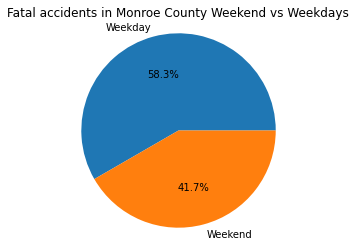

In [15]:
weekend_fatal = fatal_df["Weekend?"].value_counts()

weekend_fatal.plot(kind="pie", autopct='%1.1f%%')
plt.title('Fatal accidents in Monroe County Weekend vs Weekdays')
plt.ylabel('')

#Pandas pie chart
plt.axis("equal")
plt.show()

In [24]:
fatal_times = df[["Injury Type", "Hour"]]
fatal_hour_df = fatal_times[fatal_times["Injury Type"] == "Fatal"] 

fatal_hour_df

,Injury Type,Hour
530,Fatal,1600.0
531,Fatal,1500.0
649,Fatal,1700.0
1334,Fatal,700.0
1873,Fatal,2200.0
...,...,...
51922,Fatal,600.0
52034,Fatal,700.0
52541,Fatal,300.0
53043,Fatal,700.0


In [25]:
# Create bins in which to place values based upon hour values\n",
bins = [-0.1, 599, 1699, 2400]

# Create labels for these bins
group_labels = ["Nighttime", "Daytime", "Nighttime2"]
    
# Slice the data and place it into bins
pd.cut(fatal_hour_df["Hour"], bins, labels=group_labels).head()

530        Daytime
531        Daytime
649     Nighttime2
1334       Daytime
1873    Nighttime2
Name: Hour, dtype: category
Categories (3, object): [Nighttime < Daytime < Nighttime2]

In [26]:
# Place the data series into a new column inside of the DataFrame
fatal_hour_df["DayNight"] = pd.cut(fatal_hour_df["Hour"], bins, labels=group_labels)
fatal_hour_df.head(10)

<ipython-input-26-fbc79312829a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_hour_df["DayNight"] = pd.cut(fatal_hour_df["Hour"], bins, labels=group_labels)


,Injury Type,Hour,DayNight
530,Fatal,1600.0,Daytime
531,Fatal,1500.0,Daytime
649,Fatal,1700.0,Nighttime2
1334,Fatal,700.0,Daytime
1873,Fatal,2200.0,Nighttime2
1971,Fatal,1800.0,Nighttime2
2722,Fatal,900.0,Daytime
2945,Fatal,1400.0,Daytime
4331,Fatal,100.0,Nighttime
4444,Fatal,0.0,Nighttime


In [27]:
# Removing 2 from label
fatal_hour_df = fatal_hour_df.replace({"Nighttime2": "Nighttime"})
fatal_hour_df.head(10)

,Injury Type,Hour,DayNight
530,Fatal,1600.0,Daytime
531,Fatal,1500.0,Daytime
649,Fatal,1700.0,Nighttime
1334,Fatal,700.0,Daytime
1873,Fatal,2200.0,Nighttime
1971,Fatal,1800.0,Nighttime
2722,Fatal,900.0,Daytime
2945,Fatal,1400.0,Daytime
4331,Fatal,100.0,Nighttime
4444,Fatal,0.0,Nighttime


In [28]:
#Drop Hour times
fatal_hour_df.drop(columns=["Hour"], inplace=True)

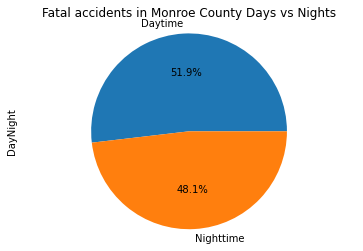

In [31]:
#Plot Chart
fatal_time_df = fatal_hour_df["DayNight"].value_counts()

fatal_time_df.plot(kind="pie", autopct='%1.1f%%')
plt.title('Fatal accidents in Monroe County Days vs Nights')

#Pandas pie chart
plt.axis("equal")
plt.show()
